In [51]:
#MLB pitch visualizations!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from matplotlib.patches import RegularPolygon, Circle, Arrow, Rectangle

In [3]:
#Import/peek at ABs dataset
ab = pd.read_csv("2019_atbats.csv")
ab.head()

inning  top         ab_id         g_id  p_score  batter_id  pitcher_id  \
0     1.0  1.0  2.019000e+09  201900001.0      0.0     594777      571666   
1     1.0  1.0  2.019000e+09  201900001.0      0.0     545361      571666   
2     1.0  1.0  2.019000e+09  201900001.0      0.0     571506      571666   
3     1.0  0.0  2.019000e+09  201900001.0      0.0     543257      502239   
4     1.0  0.0  2.019000e+09  201900001.0      0.0     656305      502239   

  stand p_throws      event  o  
0     L        R     Flyout  1  
1     R        R     Flyout  2  
2     L        R  Groundout  3  
3     L        R     Single  0  
4     R        R     Flyout  1

In [5]:
#Import/peek at games dataset
games = pd.read_csv("2019_games.csv")
games.head()

g_id home_team away_team  home_final_score  away_final_score  \
0  201900001.0       oak       ana               4.0               0.0   
1  201900002.0       lan       ari              12.0               5.0   
2  201900003.0       phi       atl              10.0               4.0   
3  201900004.0       nya       bal               7.0               2.0   
4  201900005.0       sea       bos              12.0               4.0   

         date  umpire_HP  umpire_1B  umpire_2B  umpire_3B  start_time  \
0  2019-03-28        NaN        NaN        NaN        NaN         NaN   
1  2019-03-28        NaN        NaN        NaN        NaN         NaN   
2  2019-03-28        NaN        NaN        NaN        NaN         NaN   
3  2019-03-28        NaN        NaN        NaN        NaN         NaN   
4  2019-03-28        NaN        NaN        NaN        NaN         NaN   

           venue_name  weather  wind  elapsed_time  attendance  
0    Oakland Coliseum      NaN   NaN           NaN         NaN  
1      Dodger Stadium      NaN   NaN           NaN         NaN  
2  Citizens Bank Park      NaN   NaN           NaN         NaN  
3      Yankee Stadium      NaN   NaN           NaN         NaN  
4       T-Mobile Park      NaN   NaN           NaN         NaN

In [19]:
#Player names
players = pd.read_csv("player_names.csv")
players.head()

id first_name   last_name
0  452657        Jon      Lester
1  425794       Adam  Wainwright
2  457435       Phil        Coke
3  435400      Jason       Motte
4  519166       Neil     Ramirez

In [7]:
#Pitches dataset
pitches = pd.read_csv("2019_pitches.csv")
pitches.head()

px    pz  start_speed  end_speed    spin_rate     spin_dir  break_angle  \
0  0.00  2.15         88.8       80.7  placeholder  placeholder         22.8   
1  0.34  2.31         89.9       81.8  placeholder  placeholder         22.8   
2 -0.05  2.03         85.7       79.6  placeholder  placeholder          9.6   
3  0.49  0.92         85.4       78.5  placeholder  placeholder         24.0   
4 -0.13  1.11         84.6       77.6  placeholder  placeholder         26.4   

   break_length  break_y     ax  ...  event_num  b_score         ab_id  \
0           4.8     24.0  -8.47  ...          5      0.0  2.019000e+09   
1           3.6     24.0  -7.10  ...          8      0.0  2.019000e+09   
2           6.0     24.0   3.65  ...          9      0.0  2.019000e+09   
3           7.2     24.0 -13.77  ...         10      0.0  2.019000e+09   
4           8.4     24.0 -15.99  ...         11      0.0  2.019000e+09   

   b_count s_count  outs  pitch_num  on_1b  on_2b  on_3b  
0      0.0     0.0   0.0        1.0    0.0    0.0    0.0  
1      0.0     0.0   1.0        1.0    0.0    0.0    0.0  
2      0.0     0.0   1.0        2.0    0.0    0.0    0.0  
3      0.0     1.0   1.0        3.0    0.0    0.0    0.0  
4      1.0     1.0   1.0        4.0    0.0    0.0    0.0  

[5 rows x 40 columns]

In [9]:
#Info on pitches dataset
pitches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728790 entries, 0 to 728789
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   px               722161 non-null  float64
 1   pz               722161 non-null  float64
 2   start_speed      722161 non-null  float64
 3   end_speed        722161 non-null  float64
 4   spin_rate        722161 non-null  object 
 5   spin_dir         722161 non-null  object 
 6   break_angle      722161 non-null  float64
 7   break_length     722161 non-null  float64
 8   break_y          722161 non-null  float64
 9   ax               722161 non-null  float64
 10  ay               722161 non-null  float64
 11  az               722161 non-null  float64
 12  sz_bot           728790 non-null  float64
 13  sz_top           728790 non-null  float64
 14  type_confidence  722161 non-null  object 
 15  vx0              722161 non-null  float64
 16  vy0              722161 non-null  floa

In [31]:
#variable changes to save memory
pitches[pitches.columns[0:4]] = pitches[pitches.columns[0:4]].astype('float32')
pitches[pitches.columns[6:14]] = pitches[pitches.columns[6:14]].astype('float32')
pitches[pitches.columns[15:26]] = pitches[pitches.columns[15:26]].astype('float32')
pitches[pitches.columns[26:30]] = pitches[pitches.columns[26:30]].astype('category')
pitches[pitches.columns[30:32]] = pitches[pitches.columns[30:32]].astype('int64')
pitches[pitches.columns[33:]] = pitches[pitches.columns[33:]].astype('int8')

pitches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728790 entries, 0 to 728789
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   px               722161 non-null  float32 
 1   pz               722161 non-null  float32 
 2   start_speed      722161 non-null  float32 
 3   end_speed        722161 non-null  float32 
 4   spin_rate        722161 non-null  object  
 5   spin_dir         722161 non-null  object  
 6   break_angle      722161 non-null  float32 
 7   break_length     722161 non-null  float32 
 8   break_y          722161 non-null  float32 
 9   ax               722161 non-null  float32 
 10  ay               722161 non-null  float32 
 11  az               722161 non-null  float32 
 12  sz_bot           728790 non-null  float32 
 13  sz_top           728790 non-null  float32 
 14  type_confidence  722161 non-null  object  
 15  vx0              722161 non-null  float32 
 16  vy0              722

In [25]:
ab[['event', 'p_throws', 'stand']] = ab[['event', 'p_throws', 'stand']].astype('category')
ab[['inning', 'o']] = ab[['inning', 'o']].astype('int8')

ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185245 entries, 0 to 185244
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   inning      185245 non-null  int8    
 1   top         185245 non-null  float64 
 2   ab_id       185245 non-null  float64 
 3   g_id        185245 non-null  float64 
 4   p_score     185245 non-null  float64 
 5   batter_id   185245 non-null  int64   
 6   pitcher_id  185245 non-null  int64   
 7   stand       185245 non-null  category
 8   p_throws    185245 non-null  category
 9   event       185245 non-null  category
 10  o           185245 non-null  int8    
dtypes: category(3), float64(4), int64(2), int8(2)
memory usage: 9.4 MB


In [27]:
#Data Merges
df1 = pd.merge(pitches, ab, how = 'left', left_on = 'ab_id', right_on = 'ab_id')
df1.head()

px    pz  start_speed  end_speed    spin_rate     spin_dir  break_angle  \
0  0.00  2.15    88.800003       80.7  placeholder  placeholder    22.799999   
1  0.34  2.31    89.900002       81.8  placeholder  placeholder    22.799999   
2 -0.05  2.03    85.699997       79.6  placeholder  placeholder     9.600000   
3  0.49  0.92    85.400002       78.5  placeholder  placeholder    24.000000   
4 -0.13  1.11    84.599998       77.6  placeholder  placeholder    26.400000   

   break_length  break_y     ax  ...  inning  top         g_id  p_score  \
0           4.8     24.0  -8.47  ...       1  1.0  201900001.0      0.0   
1           3.6     24.0  -7.10  ...       1  1.0  201900001.0      0.0   
2           6.0     24.0   3.65  ...       1  1.0  201900001.0      0.0   
3           7.2     24.0 -13.77  ...       1  1.0  201900001.0      0.0   
4           8.4     24.0 -15.99  ...       1  1.0  201900001.0      0.0   

  batter_id  pitcher_id  stand  p_throws   event  o  
0    594777      571666      L         R  Flyout  1  
1    545361      571666      R         R  Flyout  2  
2    545361      571666      R         R  Flyout  2  
3    545361      571666      R         R  Flyout  2  
4    545361      571666      R         R  Flyout  2  

[5 rows x 50 columns]

In [33]:
df2 = pd.merge(df1, games, how = 'left', left_on = 'g_id', right_on = 'g_id')

#add pitchers
df3 = pd.merge(df2, players, how = 'left', left_on = 'pitcher_id', right_on = 'id')

#Merge full name together
df3['p_name'] = df3[['first_name', 'last_name']].apply(lambda x: ' '.join(x.astype(str)), axis = 1)
df3.drop(['id', 'first_name', 'last_name'], axis = 1, inplace = True)

df4 = pd.merge(df3, players, how = 'left', left_on = 'batter_id', right_on = 'id')
df4['b_name'] = df4[['first_name', 'last_name']].apply(lambda x: ' '.join(x.astype(str)), axis = 1)
df4.drop(['id', 'first_name', 'last_name'], axis = 1, inplace = True)

df4.head()

px    pz  start_speed  end_speed    spin_rate     spin_dir  break_angle  \
0  0.00  2.15    88.800003       80.7  placeholder  placeholder    22.799999   
1  0.34  2.31    89.900002       81.8  placeholder  placeholder    22.799999   
2 -0.05  2.03    85.699997       79.6  placeholder  placeholder     9.600000   
3  0.49  0.92    85.400002       78.5  placeholder  placeholder    24.000000   
4 -0.13  1.11    84.599998       77.6  placeholder  placeholder    26.400000   

   break_length  break_y     ax  ...  umpire_2B  umpire_3B  start_time  \
0           4.8     24.0  -8.47  ...        NaN        NaN         NaN   
1           3.6     24.0  -7.10  ...        NaN        NaN         NaN   
2           6.0     24.0   3.65  ...        NaN        NaN         NaN   
3           7.2     24.0 -13.77  ...        NaN        NaN         NaN   
4           8.4     24.0 -15.99  ...        NaN        NaN         NaN   

         venue_name weather  wind  elapsed_time  attendance      p_name  \
0  Oakland Coliseum     NaN   NaN           NaN         NaN  Mike Fiers   
1  Oakland Coliseum     NaN   NaN           NaN         NaN  Mike Fiers   
2  Oakland Coliseum     NaN   NaN           NaN         NaN  Mike Fiers   
3  Oakland Coliseum     NaN   NaN           NaN         NaN  Mike Fiers   
4  Oakland Coliseum     NaN   NaN           NaN         NaN  Mike Fiers   

         b_name  
0  Kole Calhoun  
1    Mike Trout  
2    Mike Trout  
3    Mike Trout  
4    Mike Trout  

[5 rows x 67 columns]

Text(0.5, 1.0, 'Missing Ratio')

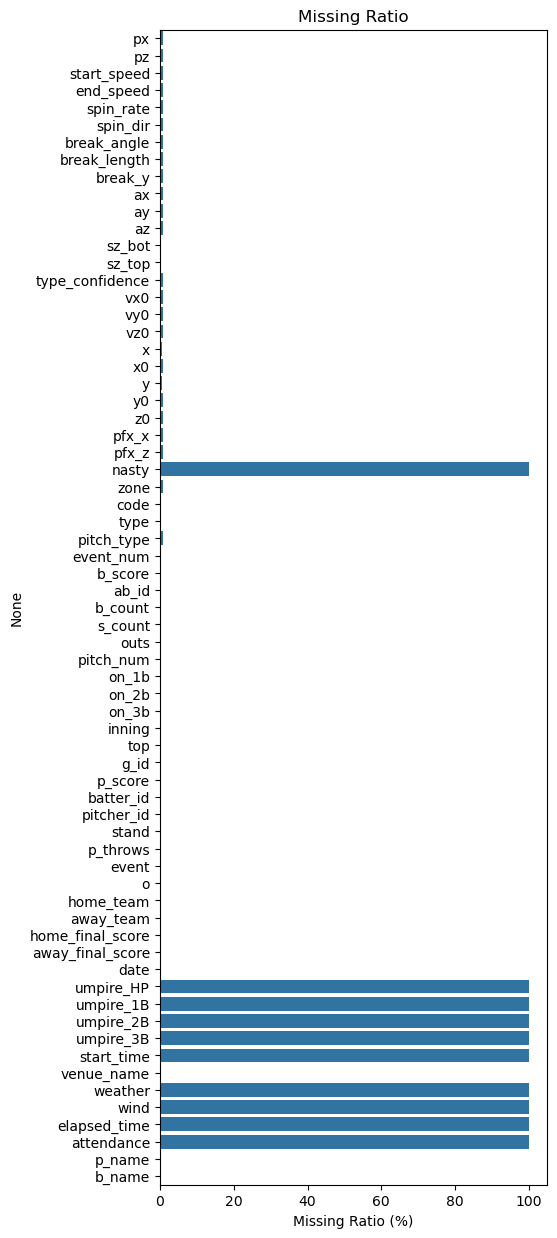

In [35]:
#Missing value check/visualization
missing_count = df4.isnull().sum()
missing_ratio = (missing_count / len(df4)) * 100
df4_missing = pd.DataFrame({'Missing Count': missing_count, 'Missing Ratio (%)': missing_ratio})

plt.figure(figsize = (5, 15), dpi = 100, facecolor = "white")

sns.barplot(
    data = df4_missing,
    x = 'Missing Ratio (%)', y = df4_missing.index)

plt.title("Missing Ratio")

In [37]:
#Info gather
df4.describe()

px             pz    start_speed      end_speed  \
count  722161.000000  722161.000000  722161.000000  722161.000000   
mean        0.038608       2.245627      88.679565      81.728267   
std         0.852991       0.962857       5.918673       5.307991   
min        -5.030000      -4.130000      50.599998      46.500000   
25%        -0.550000       1.630000      84.500000      78.100000   
50%         0.040000       2.250000      89.800003      82.800000   
75%         0.620000       2.870000      93.400002      85.800000   
max         6.290000      12.210000     104.300003      96.000000   

         break_angle   break_length        break_y             ax  \
count  722161.000000  722161.000000  722161.000000  722161.000000   
mean       20.279402       6.594887      24.000000      -2.500912   
std        12.499782       2.854838       0.001412      10.304102   
min         0.000000       1.200000      22.799999     -30.799999   
25%         8.400000       4.800000      24.000000     -11.200000   
50%        20.400000       6.000000      24.000000      -2.730000   
75%        31.200001       8.400000      24.000000       5.290000   
max       238.800003      26.400000      24.000000      28.549999   

                  ay             az  ...  away_final_score  umpire_HP  \
count  722161.000000  722161.000000  ...     728790.000000        0.0   
mean       25.595152     -23.483957  ...          5.069027        NaN   
std         3.732552       8.705865  ...          3.491365        NaN   
min         7.630000     -51.430000  ...          0.000000        NaN   
25%        22.780001     -29.490000  ...          2.000000        NaN   
50%        25.590000     -22.620001  ...          5.000000        NaN   
75%        28.350000     -16.129999  ...          7.000000        NaN   
max        46.790001      30.389999  ...         23.000000        NaN   

       umpire_1B  umpire_2B  umpire_3B  start_time  weather  wind  \
count        0.0        0.0        0.0         0.0      0.0   0.0   
mean         NaN        NaN        NaN         NaN      NaN   NaN   
std          NaN        NaN        NaN         NaN      NaN   NaN   
min          NaN        NaN        NaN         NaN      NaN   NaN   
25%          NaN        NaN        NaN         NaN      NaN   NaN   
50%          NaN        NaN        NaN         NaN      NaN   NaN   
75%          NaN        NaN        NaN         NaN      NaN   NaN   
max          NaN        NaN        NaN         NaN      NaN   NaN   

       elapsed_time  attendance  
count           0.0         0.0  
mean            NaN         NaN  
std             NaN         NaN  
min             NaN         NaN  
25%             NaN         NaN  
50%             NaN         NaN  
75%             NaN         NaN  
max             NaN         NaN  

[8 rows x 51 columns]

In [39]:
#Dictonaries
dict_pitch_arsenal = {
    "CH": "Changeup",
    "CU": "Curveball",
    "EP": "Eephus",
    "FC": "Cutter",
    "FF": "Four-seam Fastball",
    "FO": "Pitchout",
    "FS": "Splitter",
    "FT": "Two-seam Fastball",
    "IN": "Intentional ball",
    "KC": "Knuckle curve",
    "KN": "Knuckeball",
    "PO": "Pitchout",
    "SC": "Screwball",
    "SI": "Sinker",
    "SL": "Slider",
    "UN": "Unknown"
}

dict_type = {
    "S": "Strike",
    "B": "Ball",
    "X": "In-play"
}

dict_type_palette = {
    "S": "red",
    "Strike": "red",
    "B": "green",
    "Ball": "green",
    "X": "blue",
    "In-play": "blue"
}

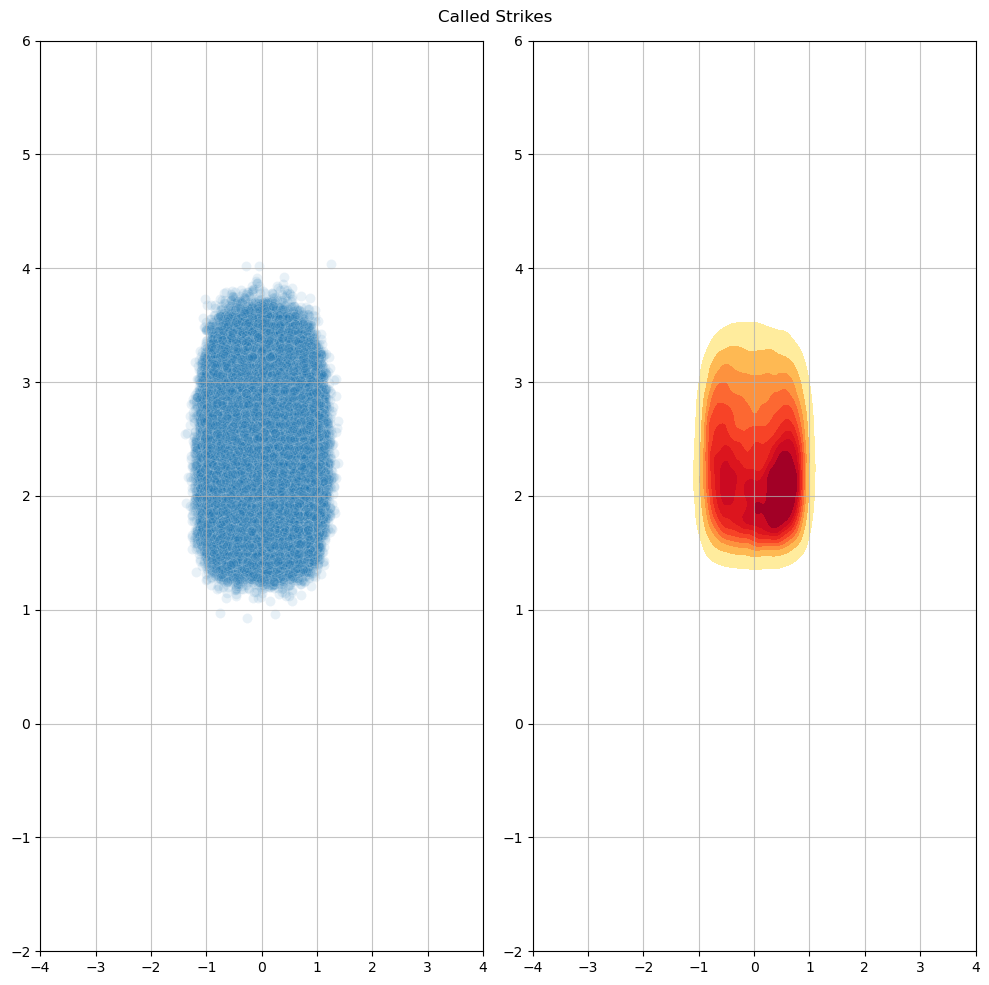

In [45]:
#Visualizing strikes
fig = plt.figure(figsize = (10, 10), dpi = 100, facecolor = "white")

layout_plot = (1, 2)
num_subplot = 2
axes = [None for _ in range(num_subplot)]

list_shape_subplot = [
     [(0, 0), (0, 1)], # loc
     [1, 1], # rowspan
     [1, 1] # colspan
 ]

for i in range(num_subplot):
     axes[i] = plt.subplot2grid(
         layout_plot, list_shape_subplot[0][i],
         rowspan = list_shape_subplot[1][i],
         colspan = list_shape_subplot[2][i]
     )
    

#scatterplot: axes[0]
sns.scatterplot(
#     # code 'C' means 'Called Strike'
     data = df4[df4.code == 'C'][['px', 'pz']],
     x = 'px', y = 'pz',
     alpha = 0.1, s = 50,
     ax = axes[0]
 )


# # kdeplot: axes[1]
sns.kdeplot(
     data = df4[df4.code == 'C'][['px', 'pz']],
     x = 'px', y = 'pz',
     cmap = 'YlOrRd', fill = True,
     ax = axes[1]
 )


# # xlim and ylim
# # xlabel and ylabel
# # grid
for i in range(num_subplot):
     axes[i].set_xlim(-4, 4)
     axes[i].set_ylim(-2, 6)

     axes[i].set_xlabel("")
     axes[i].set_ylabel("")
    
     axes[i].grid(alpha = 0.75)
     axes[i].grid(alpha = 0.75)

fig.suptitle("Called Strikes")

plt.tight_layout()
plt.show()


In [47]:
#Set the strike zone based on info above
strike_zone_x = (-0.71, 0.71)
strike_zone_y = (1.6, 3.4)
strike_zone_width = strike_zone_x[1] - strike_zone_x[0]
strike_zone_height = strike_zone_y[1] - strike_zone_y[0]

In [53]:
#visual strike zone elements
patch_strike_zone = Rectangle(
     (strike_zone_x[0], strike_zone_y[0]),
     strike_zone_width, strike_zone_height,
     linewidth = 2,
     edgecolor = 'grey', facecolor = 'none',
     alpha = 0.5)

patch_home_plate = plt.Polygon(
     [[0, -0.75],
      [strike_zone_x[1], -0.5],
      [strike_zone_x[1], 0],
      [strike_zone_x[0], 0],
      [strike_zone_x[0], -0.5]],
     color = "grey", fill = True,
     alpha = 0.5)


In [55]:
def plot_pitch_arsenal_and_event(name_pitcher):
    
    # data for the analyzing pitcher
    df_analyzing_pitcher = df4.loc[df4.p_name == name_pitcher]
    # Short form to Full name
    df_analyzing_pitcher.loc[:, 'pitch_type'] = df_analyzing_pitcher['pitch_type'].map(dict_pitch_arsenal) 
    # data for analyzing plate atbat event
    df_analyzing_pitcher_per_ab = df_analyzing_pitcher.drop_duplicates(subset = 'ab_id', keep = 'last')[['ab_id', 'event']]
    
    fig = plt.figure(figsize = (20, 10), dpi = 200, facecolor = "white")

    layout_plot = (1, 2)
    num_subplot = 2
    axes = [None for _ in range(num_subplot)]

    list_shape_subplot = [
        [(0, 0), (0, 1)], # loc
        [1, 1], # rowspan
        [1, 1] # colspan
    ]

    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )


    # countplot, pitch arsenal: axes[0]
    sns.countplot(
        
        data = df_analyzing_pitcher,
        y = 'pitch_type',
        order = df_analyzing_pitcher['pitch_type'].value_counts().index,
        ax = axes[0]
    )

    # countplot, event: axes[1]
    sns.countplot(
        data = df_analyzing_pitcher_per_ab,
        y = 'event',
        order = df_analyzing_pitcher_per_ab['event'].value_counts().index,
        ax = axes[1]
    )

    # lists
    list_title = ["Pitch Arsenal", "Event"]
    list_len_data = [len(df_analyzing_pitcher), len(df_analyzing_pitcher_per_ab)]
    
    for i in range(num_subplot):
        
        # title
        axes[i].set_title(list_title[i])
        
        # ylabel
        axes[i].set_ylabel("")
        
        # delete the right side
        axes[i].spines['right'].set_visible(False)
        
        # calculate and display ratios
        for p in axes[i].patches:
            
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            
            axes[i].annotate(
                f' {width/list_len_data[i]:.2%}',
                (x + width, y + height/2),
                va = 'center',
                fontsize = 10, color = 'black')


    # suptitle
    fig.suptitle(f"Pitch Arsenal and Event Frequency: {name_pitcher}", fontsize = 20)

    # interval adjustment and output
    plt.tight_layout()
    plt.show()

In [57]:
def plot_location_of_pitches(name_pitcher):
    
    # data for the analyzing pitcher
    df_analyzing_pitcher = df4.loc[df4.p_name == name_pitcher]
    # Short form to Full name
    df_analyzing_pitcher.loc[:, 'pitch_type'] = df_analyzing_pitcher['pitch_type'].map(dict_pitch_arsenal)
    df_analyzing_pitcher.loc[:, 'type'] = df_analyzing_pitcher['type'].map(dict_type)
    
    fig = plt.figure(figsize = (20, 20), dpi = 300, facecolor = "white")

    layout_plot = (12, 12)
    num_subplot = 5
    axes = [None for _ in range(num_subplot)]

    list_shape_subplot = [
        [(0, 0), (0, 4), (0, 6), (4, 0), (4, 4)], # loc
        [4, 4, 12, 8, 8], # rowspan
        [4, 2, 6, 4, 2] # colspan
    ]

    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )


    # histplot, x-axis: axes[0]
    sns.histplot(
        data = df_analyzing_pitcher,
        x = 'px',
        bins = 15,
        ax = axes[0]
    )


    # scatterplot, location and type: axes[1]
    sns.scatterplot(
        data = df_analyzing_pitcher,
        x = 'px', y = 'pz',
        hue = 'type',
        hue_order = ["Strike", "Ball", "In-play"], palette = dict_type_palette,
        alpha = 0.2, s = 50,
        ax = axes[1]
    )
    axes[1].legend(title = "") # hide legend title
    
    
    # scatterplot, location and arsenal: axes[2]
    sns.scatterplot(
        data = df_analyzing_pitcher,
        x = 'px', y = 'pz',
        hue = 'pitch_type',
        alpha = 0.4, s = 100,
        ax = axes[2]
    )
    axes[2].legend(title = "")
    
    
    # kdeplot, location: axes[3]
    sns.kdeplot(
        data = df_analyzing_pitcher,
        x = 'px', y = 'pz',
        cmap = 'YlOrRd', fill = True,
        ax = axes[3]
    )
    
    
    # histplot, z-axis: axes[4]
    sns.histplot(
        data = df_analyzing_pitcher,
        y = 'pz',
        bins = 15,
        ax = axes[4]
    )

    
    # lists
    list_fix_xlim = [True, True, True, True, False]
    list_fix_ylim = [False, True, True, True, True]
    list_remain_xticks = [False, False, False, False, True]
    list_remain_yticks = [True, False, False, False, False]
    list_patch_home_plate = [False, True, True, True, False]
    list_patch_strike_zone = [False, True, True, True, False]
    
    for i in range(num_subplot):
        
        # xlabel and ylabel
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        
        # xlim and ylim
        if list_fix_xlim[i]:
            axes[i].set_xlim(-4, 4)
        if list_fix_ylim[i]:
            axes[i].set_ylim(-2, 6)
            
        # xticks and yticks
        if not(list_remain_xticks[i]):
            axes[i].set_xticks([])
        if not(list_remain_yticks[i]):
            axes[i].set_yticks([])
            
        # patches
        if list_patch_home_plate[i]:
            axes[i].add_patch(
                plt.Polygon(
                    [[0, -0.75],
                     [strike_zone_x[1], -0.5],
                     [strike_zone_x[1], 0],
                     [strike_zone_x[0], 0],
                     [strike_zone_x[0], -0.5]],
                    color = "grey", fill = True,
                    alpha = 0.5
                )
            )
        if list_patch_strike_zone[i]:
            axes[i].add_patch(
                Rectangle(
                    (strike_zone_x[0], strike_zone_y[0]),
                    strike_zone_width, strike_zone_height,
                    linewidth = 5,
                    edgecolor = 'grey', facecolor = 'none',
                    alpha = 0.75
                )
            )


    # suptitle
    fig.suptitle(f"Location of Pitches: {name_pitcher}", fontsize = 20)


    # interval adjustment and output
    plt.tight_layout(rect = [0, 0.03, 1, 0.99])
    plt.show()

In [79]:
def plot_pitch_arsenal(name_pitcher, code_arsenal):
    
    # data for the analyzing pitcher
    df_analyzing_pitcher = df4.loc[df4.p_name == name_pitcher]
    
    
    # when the pitcher has not thrown that pitch arsenal
    if len(df_analyzing_pitcher[df_analyzing_pitcher.pitch_type == code_arsenal]) < 1:
        print("The pitcher has not thrown that pitch arsenal.")
        
        
    else:
        
        # data for the analyzing pitcher and pitch arsenal(analyzing arsenal + Four-seam)
        df_analyzing_pitcher_arsenal = df_analyzing_pitcher.loc[
            (df_analyzing_pitcher.pitch_type == code_arsenal) | (df_analyzing_pitcher.pitch_type == "FF")
        ]
        
        # determining RHP/LHP
        RHP_or_LHP = df_analyzing_pitcher_arsenal['p_throws'].mode()[0]
        
        # data of all pitchers(who match left and right-handedness)
        df_all_pitcher_arsenal = df4.loc[
            (df4.p_throws == RHP_or_LHP) &
            ((df4.pitch_type == code_arsenal) | (df4.pitch_type == "FF"))
        ]
        
        
        # add name column and concat, melt(to compare ball speeds)
        #warnings.filterwarnings("ignore") # ignore warning
        last_name_pitcher = f"{name_pitcher.split(' ')[1]}"
        df_analyzing_pitcher_arsenal.loc[:, 'temp_name'] = last_name_pitcher # use only last name
        df_all_pitcher_arsenal.loc[:, 'temp_name'] = "All"
        df_ball_speed = pd.melt(
            pd.concat([df_analyzing_pitcher_arsenal, df_all_pitcher_arsenal])[['pitch_type', 'start_speed', 'end_speed', 'temp_name']],
            id_vars=['pitch_type', 'temp_name'],
            var_name='speed_type',
            value_name='speed'
        )
        #warnings.resetwarnings() # reset warning


        # plot size
        fig = plt.figure(figsize = (20, 40), dpi = 300, facecolor = "white")


        # setting subplot
        layout_plot = (8, 4)
        num_subplot = 10
        axes = [None for _ in range(num_subplot)]

        list_shape_subplot = [
            [(0, 0), (0, 2), (0, 3), (2, 3), (3, 3), (4, 0), (4, 2), (4, 3), (6, 2), (6, 3)], # loc
            [4, 4, 2, 1, 1, 4, 2, 2, 2, 2], # rowspan
            [2, 1, 1, 1, 1, 2, 1, 1, 1, 1] # colspan
        ]

        for i in range(num_subplot):
            axes[i] = plt.subplot2grid(
                layout_plot, list_shape_subplot[0][i],
                rowspan = list_shape_subplot[1][i],
                colspan = list_shape_subplot[2][i]
            )


        # kdeplot, release point: axes[0]
        # vertical line for distinguishing between left and right
        axes[0].axvline(
            x = 0,
            ymin = 0, ymax = 1,
            color = 'gray',
            linestyle = '--', linewidth = 1,
            alpha = 0.25
        )
        axes[0].text(-1.3, 7.8, "RHP", fontsize = 12, ha = 'center', va = 'center')
        axes[0].text(1.3, 7.8, "LHP", fontsize = 12, ha = 'center', va = 'center')
        
        # release points for other pitch arsenal
        sns.scatterplot(
            data = df4[(df4.p_name == name_pitcher) & (df4.pitch_type != code_arsenal)],
            x = 'x0', y = 'z0',
            alpha = 0.05, s = 50,
            ax = axes[0]
        )
        
        # density of release point
        sns.kdeplot(
            data = df_analyzing_pitcher_arsenal[df_analyzing_pitcher_arsenal.pitch_type == code_arsenal],
            x = 'x0', y = 'z0',
            cmap = "YlOrRd", fill = True,
            alpha = 0.8,
            ax = axes[0]
        )
        
        # displaying median of release height
        median_height = df_analyzing_pitcher_arsenal[df_analyzing_pitcher_arsenal.pitch_type == code_arsenal]['z0'].median()
        axes[0].axhline(
            xmin = 0.45, xmax = 0.55,
            y = median_height,
            color = 'gray',
            linestyle = '--', linewidth = 1,
            alpha = 0.5
        )
        # text
        axes[0].text(
            0, median_height + 0.01,
            f"median:\n{median_height:.2f} ft",
            fontsize = 12,
            ha = 'center', va = 'bottom'
        )
        
        # displaying the median of release points and velocity
        list_df = [df_all_pitcher_arsenal, df_analyzing_pitcher_arsenal]
        list_use_color = ["#DD8452", "#4C72B0"] # [others, analyzing pitcher], based on seaborn's default color palette
        
        for i, data in enumerate(list_df):
            
            # calculating the median
            median_x0_FF = data[data.pitch_type == "FF"]['x0'].median()
            median_z0_FF = data[data.pitch_type == "FF"]['z0'].median()
            median_x0 = data[data.pitch_type == code_arsenal]['x0'].median()
            median_z0 = data[data.pitch_type == code_arsenal]['z0'].median()
            
            # release points - four-seam fastball
            axes[0].scatter(
                x = median_x0_FF, y = median_z0_FF,
                color = list_use_color[i],
                marker = 'x',
                s = 110,
                label = dict_pitch_arsenal[code_arsenal]
            )
            
            # release points - analyzing arsenal
            axes[0].scatter(
                x = median_x0, y = median_z0,
                color = list_use_color[i],
                marker = 'o',
                s = 90,
                label = dict_pitch_arsenal[code_arsenal]
            )
            
            # velocity - pitching moment
            axes[0].annotate(
                '',
                xy = (
                    median_x0 + 0.2 * data[data.pitch_type == code_arsenal]['vx0'].median(),
                    median_z0 + 0.2 * data[data.pitch_type == code_arsenal]['vz0'].median()
                ),
                xytext = (median_x0, median_z0),
                arrowprops = dict(edgecolor = list_use_color[i], arrowstyle = '->', lw = 2)
            )
        
        # fix xlim, ylim
        axes[0].set_xlim(-4, 4)
        axes[0].set_ylim(-1, 8)
        

        # add legend
        list_marker = ["o", "x"]
        list_name = [last_name_pitcher, "All"]
        list_arsenal = [dict_pitch_arsenal[code_arsenal], "Four-seam Fastball"]
        legend_elements = []
        for i, name in enumerate([last_name_pitcher, "All"]):
            for j in range(2):
                legend_elements.append(
                    Line2D(
                        [0], [0],
                        marker = list_marker[j], color = list_use_color[1-i],
                        label = f"{name}_{list_arsenal[j]}",
                        markersize = 10,
                        linestyle = 'none'
                    )
                )
        axes[0].legend(handles = legend_elements, loc = 'upper center')


        # boxplot, ball speed: axes[1]
        sns.boxplot(
            data = df_ball_speed[df_ball_speed.pitch_type == code_arsenal],
            x = 'speed_type', y = 'speed',
            hue = 'temp_name',
            ax = axes[1]
        )
        axes[1].legend(title = "") # hide legend title
        
        # fix ylim
        axes[1].set_ylim(50, 110)
        
        # revise xticklabels
        axes[1].set_xticklabels(["Start", "End"])


        # boxplot, spin rate: axes[2]
        sns.boxplot(
            data = [
                df_analyzing_pitcher_arsenal[df_analyzing_pitcher_arsenal.pitch_type == code_arsenal]['spin_rate'],
                df_all_pitcher_arsenal[df_all_pitcher_arsenal.pitch_type == code_arsenal]['spin_rate']
            ],
            ax = axes[2]
        )
        
        axes[2].set_title('Spin Rate')
        axes[2].set_ylim(0, 4000)
        axes[2].set_xticklabels([last_name_pitcher, "All"])
        
        
        # arrow, spin direction: axes[3]
        axes[3].axvline(x = 0, color = 'gray', linewidth = 1, linestyle = '--', alpha = 0.5)
        axes[3].axhline(y = 0, color = 'gray', linewidth = 1, linestyle = '--', alpha = 0.5)
        
        axes[3].text(2.75, 0, '270°', fontsize = 12, ha = 'right', va = 'center')
        axes[3].text(0, 2.75, '(lift)\n180°', fontsize = 12, ha = 'center', va = 'top')
        axes[3].text(-2.75, 0, '90°', fontsize = 12, ha = 'left', va = 'center')
        axes[3].text(0, -2.75, '360°\n(drop)', fontsize = 12, ha = 'center', va = 'bottom')
        
        # ball
        patch_ball = Circle((0, 0), radius = 1, edgecolor = 'black', facecolor = 'none', lw = 2)
        axes[3].add_patch(patch_ball)
        
        # arrow
        arrow_length = 2
        for i, data in enumerate(list_df):
            
            # calculating the median
            median_spin_dir = data[data.pitch_type == code_arsenal]['spin_dir'].median()
            median_spin_dir_radian = np.radians(median_spin_dir)
            
            # draw arrow(catcher's perspective)
            arrow_start = (
                arrow_length * np.sin(median_spin_dir_radian),
                arrow_length * np.cos(median_spin_dir_radian)
            )
            arrow_end = tuple(-x for x in arrow_start)
            axes[3].annotate(
                '',
                xy = arrow_end,
                xytext = arrow_start,
                arrowprops = dict(edgecolor = list_use_color[i], arrowstyle = '->', lw = 2)
            )
        
        # fix xlim, ylim
        axes[3].set_xlim(-3, 3)
        axes[3].set_ylim(-3, 3)
        

        # arrow, movement: axes[4]
        axes[4].text(
            0, 19.75,
            "(compared to a theoretical pitch\nthrown at the same speed\nwith no spin-induced movement)",
            fontsize = 10,
            ha = 'center', va = 'top'
        )
        
        # ball
        patch_ball = Circle((0, 0), radius = 2, edgecolor = 'black', facecolor = 'none', lw = 2)
        axes[4].add_patch(patch_ball)
        
        # arrow
        for i, data in enumerate(list_df):
            
            # calculating the median
            median_pfxx = data[data.pitch_type == code_arsenal]['pfx_x'].median()
            median_pfxz = data[data.pitch_type == code_arsenal]['pfx_z'].median()
            
            # grid
            if i == 1:
                axes[4].axvline(x = median_pfxx, color = 'gray', linewidth = 1, linestyle = '--', alpha = 0.5)
                axes[4].axhline(y = median_pfxz, color = 'gray', linewidth = 1, linestyle = '--', alpha = 0.5)
            
            # draw arrow(catcher's perspective)
            arrow_start = (0, 0)
            arrow_end = (median_pfxx, median_pfxz)
            axes[4].annotate(
                '',
                xy = arrow_end,
                xytext = arrow_start,
                arrowprops = dict(edgecolor = list_use_color[i], arrowstyle = '->', lw = 2)
            )
            
        # fix xlim, ylim
        axes[4].set_xlim(-20, 20)
        axes[4].set_ylim(-20, 20)
            
        
        # kdeplot, location: axes[5]
        sns.kdeplot(
            data = df_analyzing_pitcher_arsenal,
            x = 'px', y = 'pz',
            cmap = 'YlOrRd', fill = True,
            ax = axes[5]
        )
        
        
        # scatterplot, location(strike): axes[6]
        df_location_by_type = df_analyzing_pitcher_arsenal[df_analyzing_pitcher_arsenal.pitch_type == code_arsenal][['px', 'pz', 'code', 'type']]
        sns.scatterplot(
            data = df_location_by_type[(df_location_by_type['type'] == "S") & (df_location_by_type['code'] != "F")],
            x = 'px', y = 'pz',
            alpha = 0.25, s = 100,
            ax = axes[6]
        )
        
        
        # scatterplot, location(ball): axes[7]
        sns.scatterplot(
            data = df_location_by_type[df_location_by_type['type'] == "B"],
            x = 'px', y = 'pz',
            alpha = 0.25, s = 100,
            ax = axes[7]
        )
        
        
        # scatterplot, location(foul): axes[8]
        sns.scatterplot(
            data = df_location_by_type[df_location_by_type['code'] == "F"],
            x = 'px', y = 'pz',
            alpha = 0.25, s = 100,
            ax = axes[8]
        )
        
        
        # scatterplot, location(foul): axes[9]
        sns.scatterplot(
            data = df_location_by_type[df_location_by_type['type'] == "X"],
            x = 'px', y = 'pz',
            alpha = 0.25, s = 100,
            ax = axes[9]
        )


        # lists
        list_title = ["Release Point & Velocity", "Ball Speed", "Spin Rate", "Spin Direction", "Movement",
                      "Location", "Strike(except Foul)", "Ball", "Foul", "In-play"]
        list_remain_xticks = [False, True, True, False, True, False, False, False, False, False]
        list_remain_yticks = [True, True, True, False, True, False, False, False, False, False]
        list_patch_home_plate = [True, False, False, False, False, True, True, True, True, True]
        list_patch_strike_zone = [False, False, False, False, False, True, True, True, True, True]

        for i in range(num_subplot):
            
            # title
            axes[i].set_title(list_title[i])
            
            # xlabel and ylabel
            if i == 0: # release height
                axes[i].set_xlabel("")
                axes[i].set_ylabel("ft")
            elif i == 1: # ball speed
                axes[i].set_xlabel("")
                axes[i].set_ylabel("mph")
            elif i == 2: # spin rate
                axes[i].set_xlabel("")
                axes[i].set_ylabel("rpm")
            elif i == 4: # movement
                axes[i].set_xlabel("in")
                axes[i].set_ylabel("in")
            else:
                axes[i].set_xlabel("")
                axes[i].set_ylabel("")
                
            # fix xlim and ylim
            if i >= 5:
                axes[i].set_xlim(-4, 4)
                axes[i].set_ylim(-2, 6)

            # xticks and yticks
            if not(list_remain_xticks[i]):
                axes[i].set_xticks([])
            if not(list_remain_yticks[i]):
                axes[i].set_yticks([])

            # patches
            if list_patch_home_plate[i]:
                axes[i].add_patch(
                    plt.Polygon(
                        [[0, -0.75],
                         [strike_zone_x[1], -0.5],
                         [strike_zone_x[1], 0],
                         [strike_zone_x[0], 0],
                         [strike_zone_x[0], -0.5]],
                        color = "grey", fill = True,
                        alpha = 0.5
                    )
                )
            if list_patch_strike_zone[i]:
                axes[i].add_patch(
                    Rectangle(
                        (strike_zone_x[0], strike_zone_y[0]),
                        strike_zone_width, strike_zone_height,
                        linewidth = 5,
                        edgecolor = 'grey', facecolor = 'none',
                        alpha = 0.75
                    )
                )


        # suptitle
        fig.suptitle(f"Pitch Arsenal Analysis: {name_pitcher}, {dict_pitch_arsenal[code_arsenal]}", fontsize = 20)


        # interval adjustment and output
        plt.tight_layout(rect = [0, 0.03, 1, 0.98])
        plt.show()

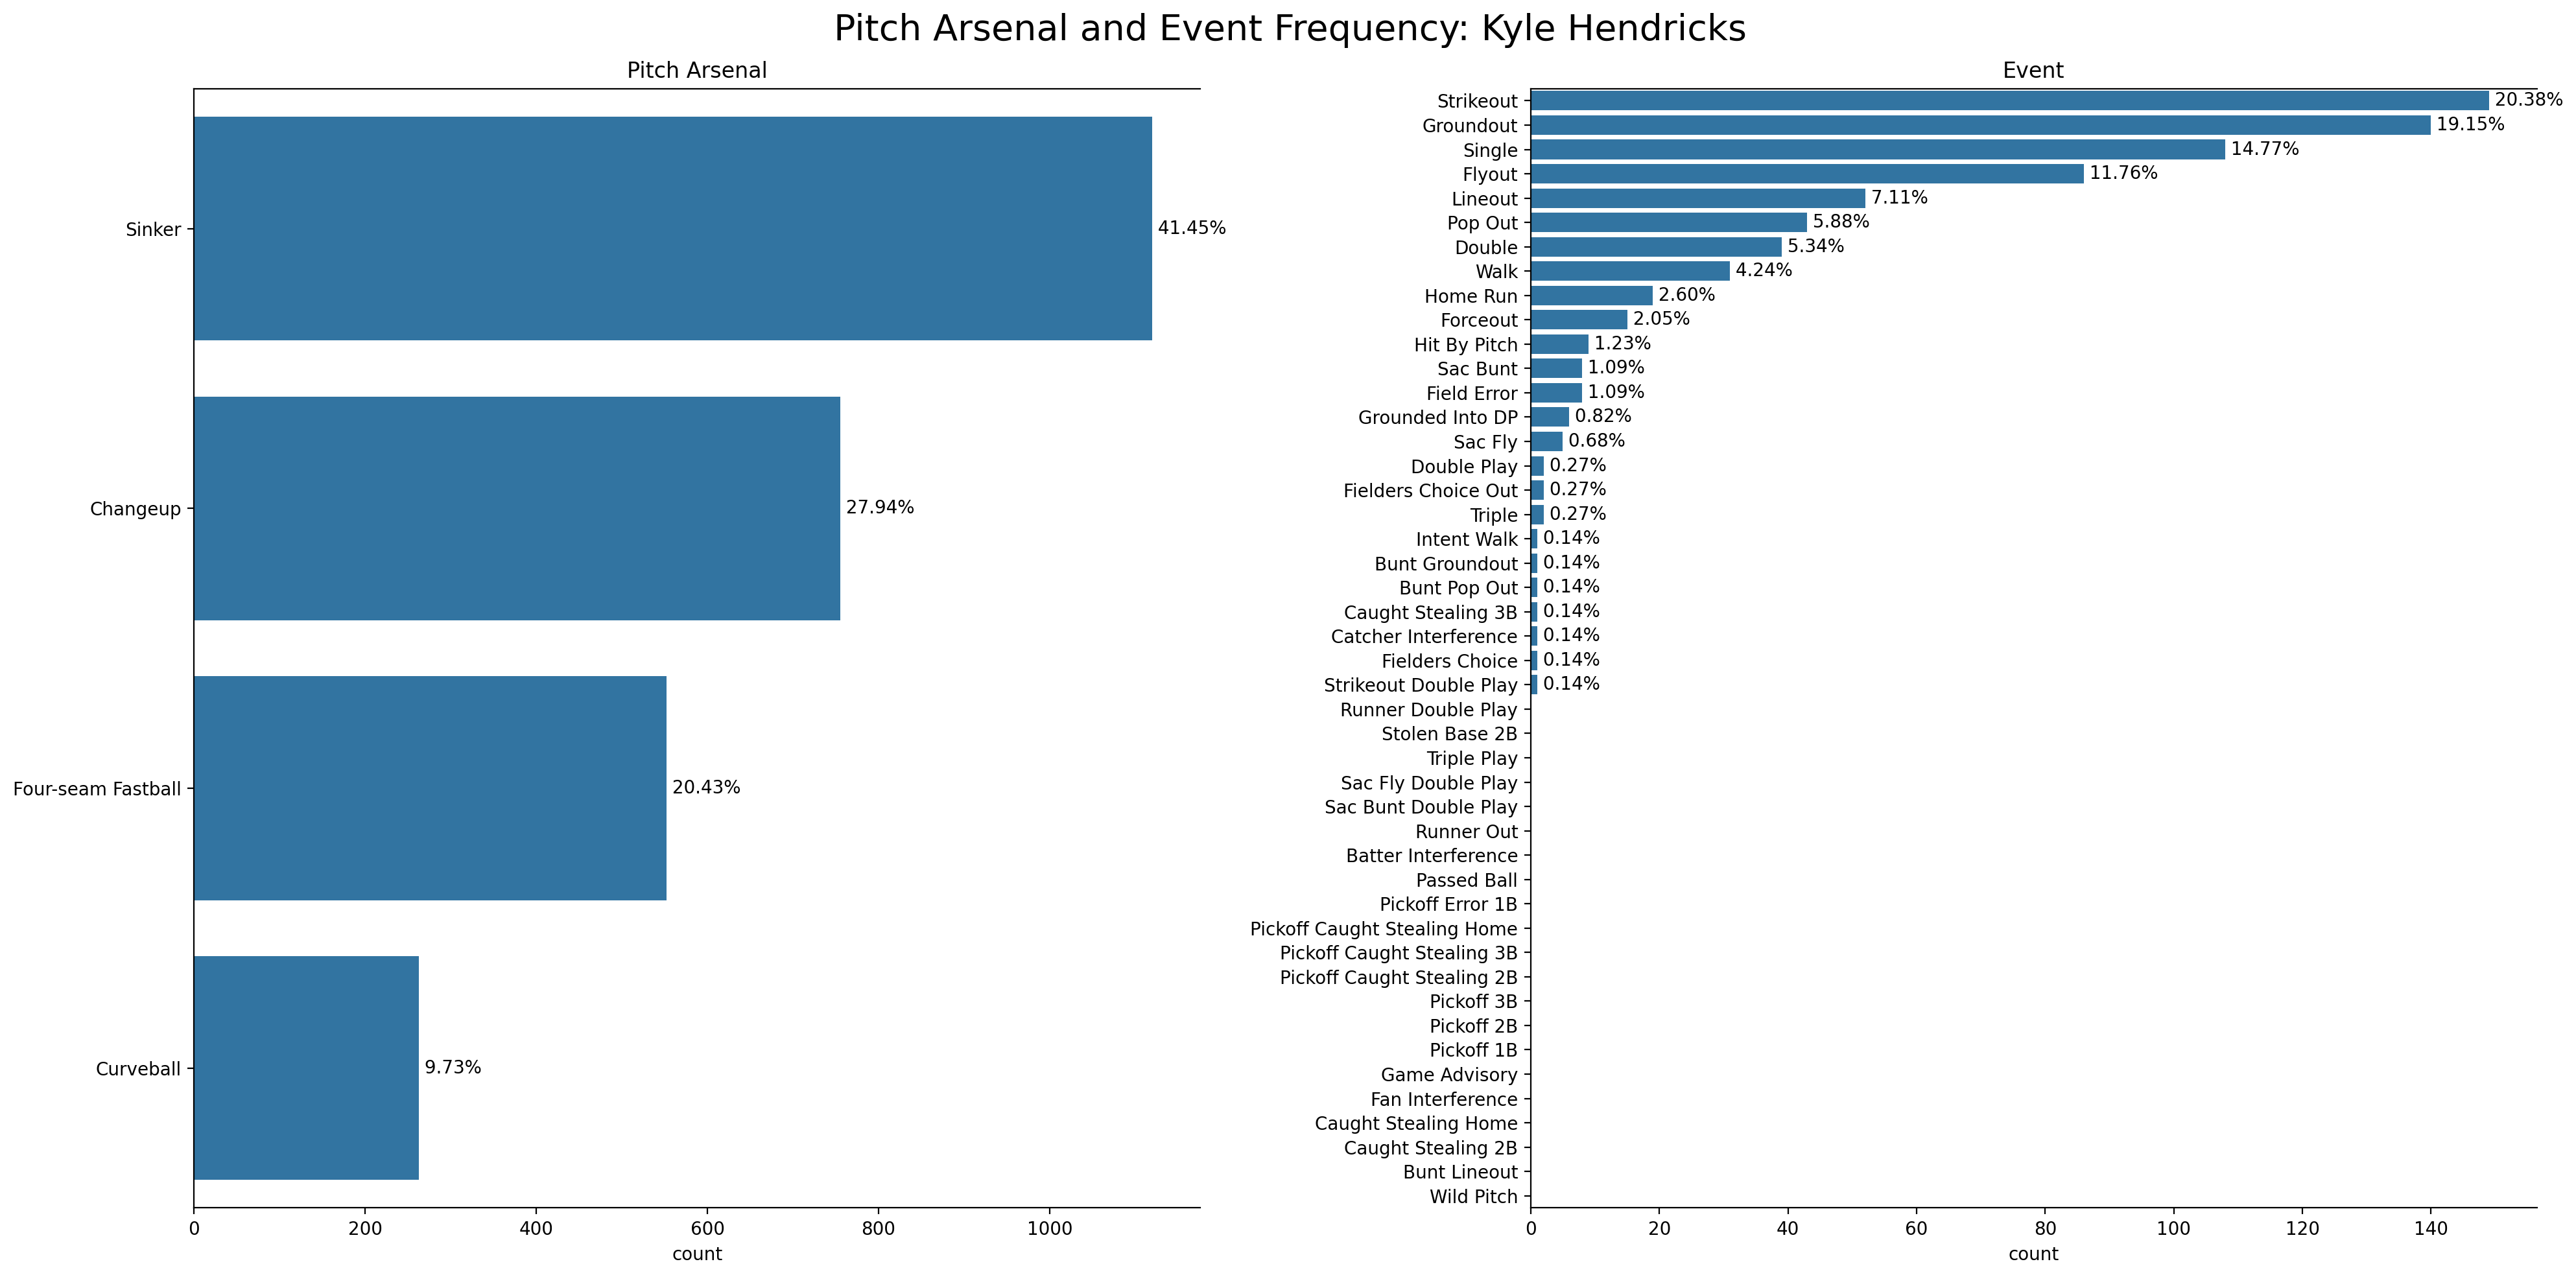

In [61]:
#Plot pitchers!
plot_pitch_arsenal_and_event("Kyle Hendricks")

C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_3492\4113156892.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan 'Ball' nan]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_analyzing_pitcher.loc[:, 'type'] = df_analyzing_pitcher['type'].map(dict_type)


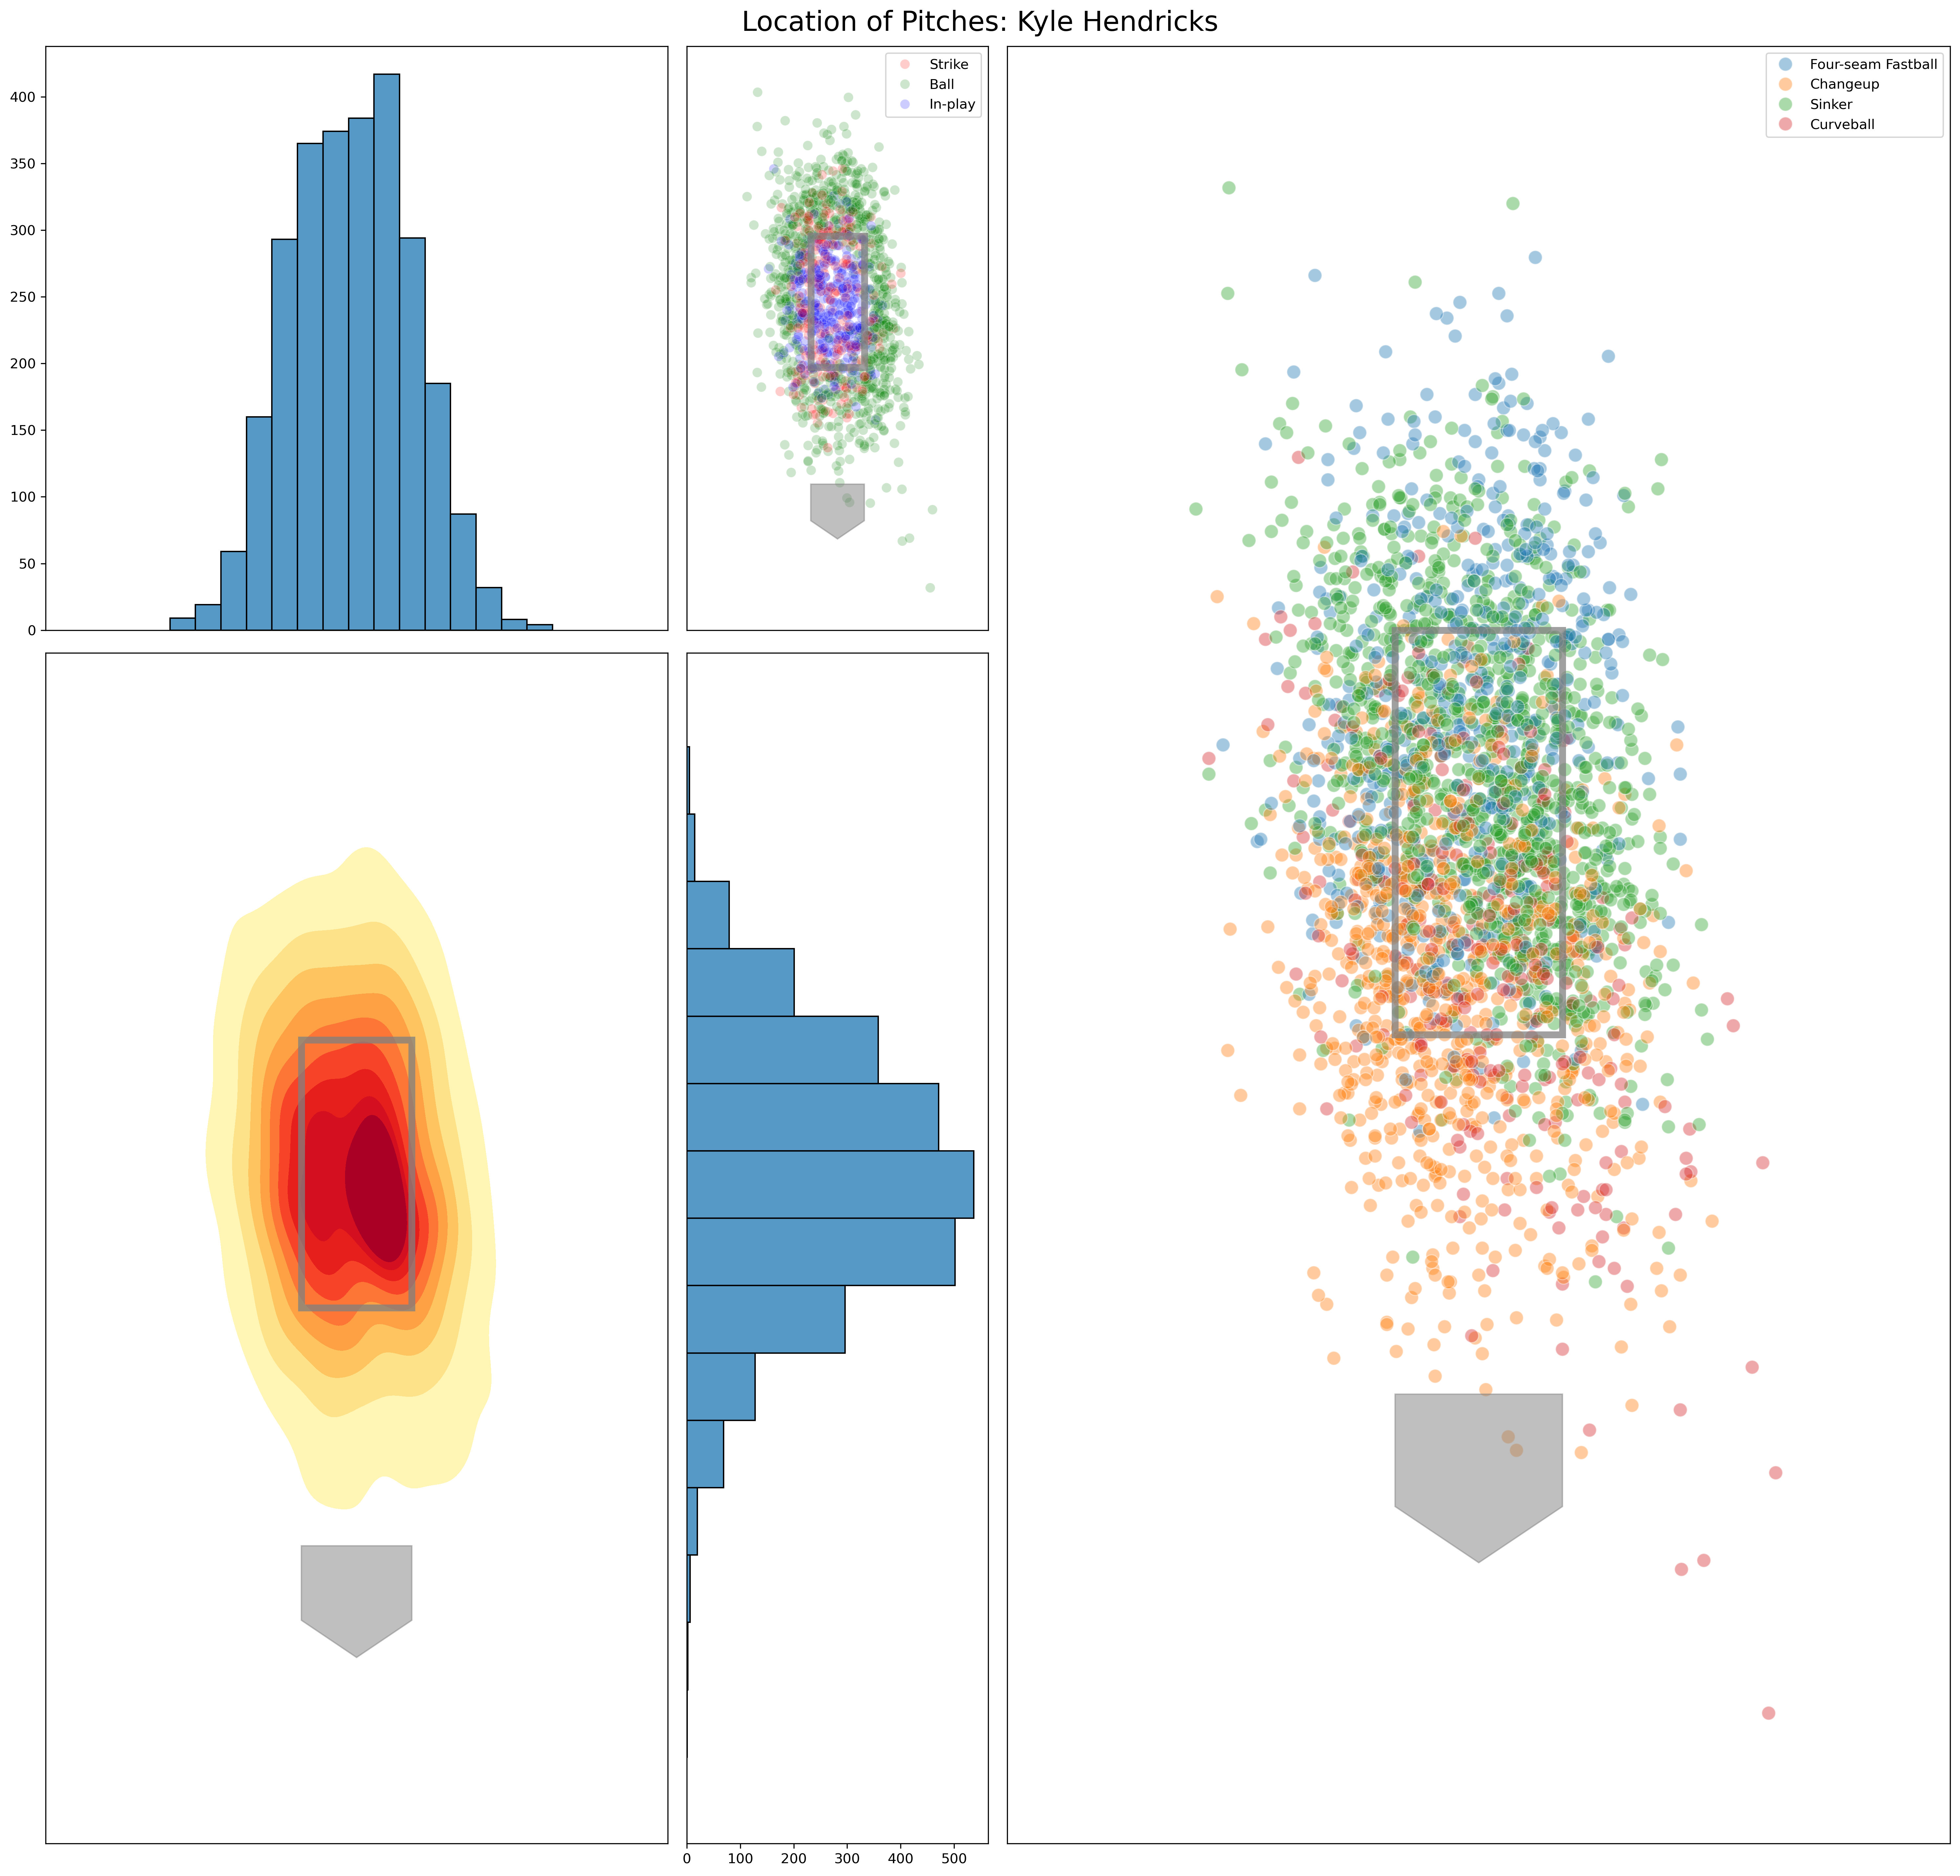

In [63]:
plot_location_of_pitches("Kyle Hendricks")